# Clustering
## KMeans

In [2]:
df <- read.csv('evasao.csv')
head(df)
str(df)
summary(df)

periodo,bolsa,repetiu,ematraso,disciplinas,faltas,desempenho,abandonou
2,0.25,8,1,4,0,0.000000,1
2,0.15,3,1,3,6,5.333333,0
4,0.10,0,1,1,0,8.000000,0
4,0.20,8,1,1,0,4.000000,1
1,0.20,3,1,1,1,8.000000,0
5,0.20,2,1,2,0,3.500000,1


'data.frame':	300 obs. of  8 variables:
 $ periodo    : int  2 2 4 4 1 5 9 2 9 5 ...
 $ bolsa      : num  0.25 0.15 0.1 0.2 0.2 0.2 0.1 0.15 0.15 0.15 ...
 $ repetiu    : int  8 3 0 8 3 2 6 3 7 3 ...
 $ ematraso   : int  1 1 1 1 1 1 1 0 1 0 ...
 $ disciplinas: int  4 3 1 1 1 2 1 2 5 1 ...
 $ faltas     : int  0 6 0 0 1 0 1 2 10 1 ...
 $ desempenho : num  0 5.33 8 4 8 ...
 $ abandonou  : int  1 0 0 1 0 1 0 1 0 0 ...


    periodo          bolsa           repetiu         ematraso     
 Min.   : 1.00   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.: 3.00   1st Qu.:0.0500   1st Qu.:0.000   1st Qu.:0.0000  
 Median : 5.00   Median :0.1000   Median :2.000   Median :0.0000  
 Mean   : 5.46   Mean   :0.1233   Mean   :2.777   Mean   :0.4767  
 3rd Qu.: 8.00   3rd Qu.:0.2000   3rd Qu.:5.000   3rd Qu.:1.0000  
 Max.   :10.00   Max.   :0.2500   Max.   :8.000   Max.   :1.0000  
  disciplinas        faltas         desempenho       abandonou   
 Min.   :0.000   Min.   : 0.000   Min.   : 0.000   Min.   :0.00  
 1st Qu.:1.000   1st Qu.: 0.000   1st Qu.: 0.400   1st Qu.:0.00  
 Median :2.000   Median : 1.000   Median : 2.000   Median :0.00  
 Mean   :2.293   Mean   : 2.213   Mean   : 2.623   Mean   :0.41  
 3rd Qu.:4.000   3rd Qu.: 4.000   3rd Qu.: 4.000   3rd Qu.:1.00  
 Max.   :5.000   Max.   :10.000   Max.   :10.000   Max.   :1.00  

In [3]:
library(dplyr)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [4]:
df2 <- filter(df,df$abandonou == 1)  %>% select('periodo','repetiu','desempenho')
head(df2)

periodo,repetiu,desempenho
2,8,0.0
4,8,4.0
5,2,3.5
2,3,4.5
3,4,2.5
3,5,2.0


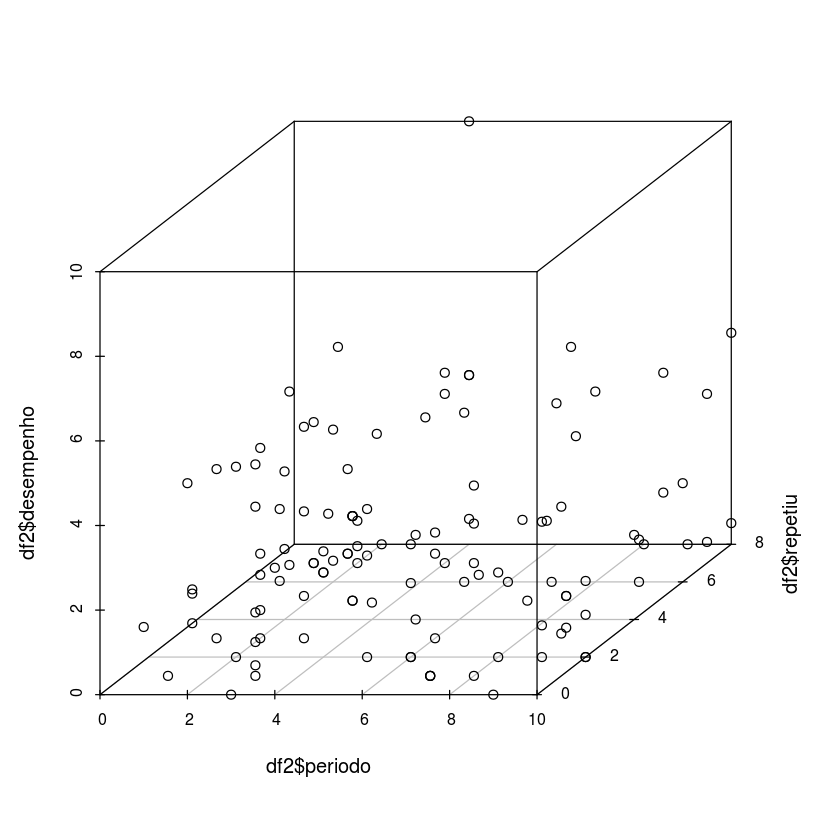

In [5]:
#install.packages('scatterplot3d')
library(scatterplot3d)
scatterplot3d(df2$periodo,df2$repetiu,df2$desempenho)

In [6]:
modelo <- kmeans(df2,4)

In [7]:
modelo

K-means clustering with 4 clusters of sizes 33, 44, 18, 28

Cluster means:
   periodo  repetiu desempenho
1 8.090909 2.030303   1.342929
2 2.863636 2.250000   1.976894
3 8.444444 6.722222   2.018519
4 2.750000 6.642857   2.214286

Clustering vector:
  [1] 4 4 2 2 2 4 2 1 3 2 1 4 4 4 1 1 1 4 2 4 2 1 1 4 1 3 2 2 1 4 2 2 4 4 3 1 3
 [38] 1 1 4 1 4 2 4 3 4 3 1 4 3 2 4 2 1 1 1 3 1 1 3 1 2 1 2 2 3 2 1 3 2 4 4 1 2
 [75] 2 3 2 1 2 2 2 2 3 2 2 1 2 4 3 4 2 3 2 1 2 2 2 3 2 4 2 1 3 2 2 1 2 4 1 3 4
[112] 4 2 2 2 1 1 4 4 2 2 1 1

Within cluster sum of squares by cluster:
[1] 154.5670 232.8197 124.0494 221.9217
 (between_SS / total_SS =  66.8 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

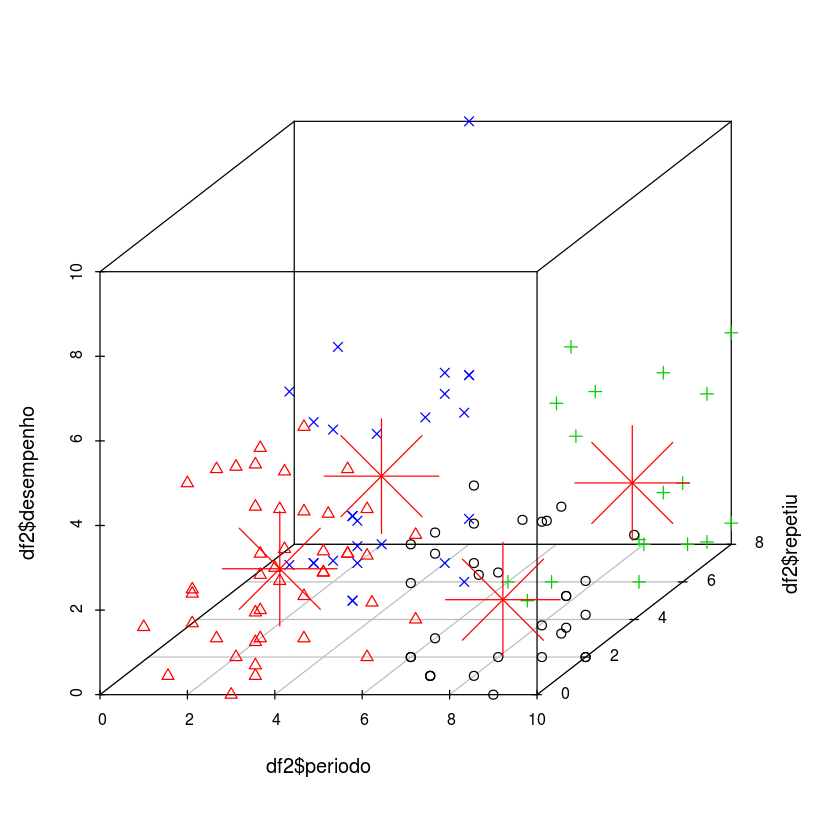

In [14]:
plot <- scatterplot3d(df2$periodo,df2$repetiu,df2$desempenho, color = modelo$cluster, pch = modelo$cluster)
plot$points3d(modelo$centers, pch = 8, col = 2, cex = 9)